In [1]:
#import libraries
import matplotlib.pyplot as plt
import numpy as np

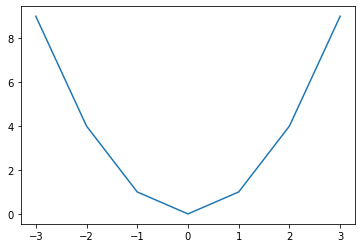

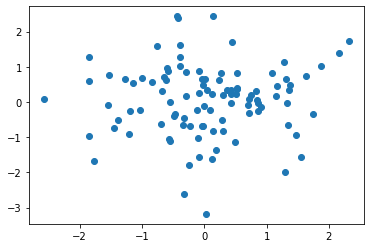

In [2]:
#some example plots (used practice code)


'''line plot'''
a = np.array([-3, -2, -1, 0, 1, 2, 3])
b = np.square(a)
plt.plot(a, b)
plt.show()

'''scatter plot'''
a = np.random.randn(100)
b = np.random.randn(100)
plt.scatter(a, b)
plt.show()

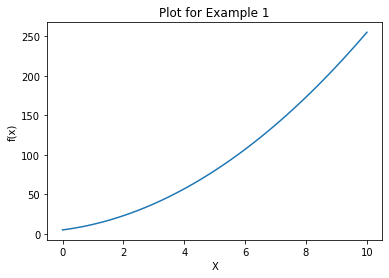

In [6]:
#Plot 2x^2+5x+5 function from values from 0 to 10

def f(x):
    return 2*x**2 + 5*x + 5

#Randomly generate 50 numbers between 0 to 10
x = np.linspace(0, 10, 50)

#Set y equals
y=f(x)

#Plot the function!
plt.plot(x,y)
#It creates a curved line

#Create Labels
plt.xlabel('X')
plt.ylabel('f(x)')
plt.title('Plot for Example 1')

plt.show()

Text(0.5, 1.0, 'Plot of Sine and Cosine Functions')

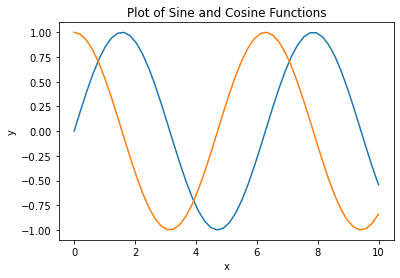

In [10]:
#Exercise 2
#Plot Sine and Cosine function from values from 0 to 10

import math 

#Randomly generate 50 numbers between 0 to 10
x = np.linspace(0, 10, 50)

#Create sin and cosine 
y_sin=np.sin(x)
y_cos=np.cos(x)

#Plot the function!
plt.plot(x,y_sin)

plt.plot(x, y_cos)
#Very cool you can put the functions in together so easily

#Let's give them a title

plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of Sine and Cosine Functions')


Text(0.5, 1.0, 'Sea Level Data from 1990 to 2010')

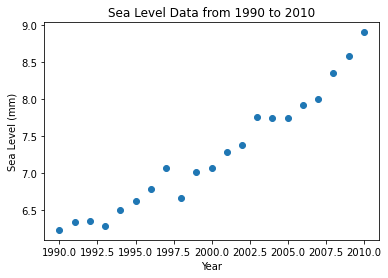

In [13]:
#Exercise 3

#Below are the sea level data in mm from 1990 to 2010

#sea_level = [6.232283458, 6.334645663, 6.35826771, 6.291338576, 6.499999993, 6.618110229, 6.787401568, 7.066929127, 6.665354324, 7.011811016, 7.062992119, 7.287401567, 7.381889756, 7.759842512, 7.740157472, 7.74409448, 7.917322827, 7.996062984, 8.350393692, 8.586614164, 8.901574794]

#plot scatter plot x axis the year and y axis sea level

sea_level = [6.232283458, 6.334645663, 6.35826771, 6.291338576, 6.499999993, 6.618110229, 6.787401568, 7.066929127, 6.665354324, 7.011811016, 7.062992119, 7.287401567, 7.381889756, 7.759842512, 7.740157472, 7.74409448, 7.917322827, 7.996062984, 8.350393692, 8.586614164, 8.901574794]

#Add the years for our new X axis
years=range(1990,2011)

plt.scatter(years, sea_level)

#Now let's give this a title
plt.xlabel('Year')
plt.ylabel('Sea Level (mm)')
plt.title('Sea Level Data from 1990 to 2010')


In [43]:
pip install geopandas

Note: you may need to restart the kernel to use updated packages.


In [44]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [1]:
####Practice making maps with Philadelphia code

In [45]:
import geopandas as gpd

In [46]:
# Read in the data

releases = gpd.read_file("toxic_release_pennsylvania.shp") 
releases.head()

,YEAR,CITY,COUNTY,ST,LATITUDE,LONGITUDE,CHEMICAL,UNIT_OF_ME,TOTAL_RELE,geometry
0,2016,PHILADELPHIA,PHILADELPHIA,PA,40.005901,-75.072103,FORMIC ACID,Pounds,0.160,POINT (2718560.227 256380.179)
1,2016,PHILADELPHIA,PHILADELPHIA,PA,39.920120,-75.146410,ETHYLENE GLYCOL,Pounds,13353.480,POINT (2698674.606 224522.905)
2,2016,PHILADELPHIA,PHILADELPHIA,PA,40.023880,-75.220450,CERTAIN GLYCOL ETHERS,Pounds,104.135,POINT (2676833.394 261701.856)
3,2016,PHILADELPHIA,PHILADELPHIA,PA,39.913540,-75.198890,LEAD COMPOUNDS,Pounds,1730.280,POINT (2684030.004 221697.388)
4,2016,PHILADELPHIA,PHILADELPHIA,PA,39.913540,-75.198890,BENZENE,Pounds,39863.290,POINT (2684030.004 221697.388)


In [47]:
stations = gpd.read_file("PhillyHealth_Air_Monitoring_Stations.shp")
stations.head()

,SITE_NAME,ADDRESS,BLACK_CARB,ULTRAFINE_,CO,SO2,OZONE,NO2,NOY_NO,PM10,...,PAMS_VOC,TSP_11101,TSP_METALS,TSP_LEAD,TOXICS_TO1,MET,COMMUNITY_,LATITUDE,LONGITUDE,geometry
0,LAB,1501 East Lycoming Avenue,N,N,Y,N,Y,Y,Y,N,...,Y,N,Y,N,y,N,N,40.008606,-75.097624,POINT (2711384.641 257149.310)
1,ROX,Eva and Dearnley Streets,N,N,N,N,N,N,N,N,...,N,N,Y,N,Y,N,N,40.050461,-75.236966,POINT (2671934.290 271248.900)
2,NEA,Grant Avenue and Ashton Street,N,N,N,N,Y,N,N,N,...,N,N,N,N,N,Y,N,40.072073,-75.013128,POINT (2734326.638 280980.247)
3,CHS,500 South Broad Street,N,N,N,N,N,N,N,N,...,N,N,Y,N,Y,N,N,39.944510,-75.165442,POINT (2693078.580 233247.101)
4,NEW,2861 Lewis Street,N,N,Y,Y,Y,N,Y,Y,...,N,Y,N,Y,N,Y,N,39.991688,-75.080378,POINT (2716399.773 251134.976)


In [48]:
#Measure distance

print(stations.crs)
print(releases.crs)

EPSG:2272
EPSG:2272


In [49]:
# Check a particular recent toxic release in Philly
recent_release = releases.iloc[320]

# Measure distance from release to each station
distances = stations.geometry.distance(recent_release.geometry)
distances

0     24495.364674
1     43174.079074
2     57343.166673
3      5913.317401
4     23480.457786
5     15712.206064
6      2894.521455
7     32281.044535
8     58777.620992
9     18217.517529
10    20997.998261
11      622.935337
dtype: float64

In [50]:
print('Mean distance to monitoring stations: {} feet'.format(distances.mean()))

Mean distance to monitoring stations: 25325.852481671955 feet


In [51]:
print('Closest monitoring station ({} feet):'.format(distances.min()))
print(stations.iloc[distances.idxmin()][["ADDRESS", "LATITUDE", "LONGITUDE"]])

Closest monitoring station (622.9353374169327 feet):
ADDRESS      6th and Arch
LATITUDE        39.952756
LONGITUDE      -75.149908
Name: 11, dtype: object


In [52]:
#Create buffer zones to be used later

two_mile_buffer = stations.geometry.buffer(2*5280)
two_mile_buffer.head()

0    POLYGON ((2721944.641 257149.310, 2721893.792 ...
1    POLYGON ((2682494.290 271248.900, 2682443.441 ...
2    POLYGON ((2744886.638 280980.247, 2744835.789 ...
3    POLYGON ((2703638.580 233247.101, 2703587.731 ...
4    POLYGON ((2726959.773 251134.976, 2726908.924 ...
dtype: geometry

In [53]:
!pip install GeoJson

In [3]:
#Create a map with toxic releases and monitoring stations!
import folium
from folium import GeoJson
from folium import Marker
from folium.plugins import HeatMap

map = folium.Map(location=[39.9526,-75.1652], zoom_start=11)
HeatMap(data=releases[['LATITUDE', 'LONGITUDE']], radius=15).add_to(map)
for idx, row in stations.iterrows():
    Marker([row['LATITUDE'], row['LONGITUDE']]).add_to(map)
    
#Plot each polygon on the map
GeoJson(two_mile_buffer.to_crs(epsg=4326)).add_to(map)

#Adding the name of chemical released as an extension to the assignment
for idx, row in releases.iterrows():
    folium.Marker(
        location=[row['LATITUDE'], row['LONGITUDE']],
        icon=folium.Icon(icon='info-sign'),
        popup=row['CHEMICAL']
    ).add_to(map)

#What a cool map!!!
map

NameError: name 'releases' is not defined

In [90]:
#Test for toxic release

#Turn group of polygons into single multipolygon
my_union = two_mile_buffer.geometry.unary_union
print('Type:', type(my_union))

#Show the MultiPolygon object
my_union

# The closest station is less than 1.25 miles away
my_union.contains(releases.iloc[320].geometry)

#Check different location
my_union.contains(releases.iloc[171].geometry)

###End of practice code

Type: <class 'shapely.geometry.multipolygon.MultiPolygon'>


False

In [56]:
#Exercise begins here: Make maps with collisions and hospital data from NYC

def embed_map(m, file_name):
    from IPython.display import IFrame
    m.save(file_name)
    return IFrame(file_name, width='100%', height='500px')

In [28]:
#Get collisions data
import pandas as pd

dtype_mapping = {'BOROUGH': str}
collisions = pd.read_csv('nypd-motor-vehicle-collisions.csv', dtype=dtype_mapping, low_memory=False)
collisions = collisions[collisions.LATITUDE > 40.5011072]
collisions = collisions[collisions.LATITUDE < 40.9122231]
collisions = collisions[collisions.LONGITUDE > -74.2482769]
collisions = collisions[collisions.LONGITUDE < -73.700584]

#Create geometry column here for later
geometry = [Point(xy) for xy in zip(collisions['LONGITUDE'], collisions['LATITUDE'])]

# Create a GeoDataFrame with the new geometry column
collisions = gpd.GeoDataFrame(collisions, geometry=geometry)

collisions.head()

,ACCIDENT DATE,ACCIDENT TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,geometry
0,2019-08-05T00:00:00.000,16:30,QUEENS,11434,40.676052,-73.790184,"{'type': 'Point', 'coordinates': [-73.790184, ...",NaN,NaN,150-08 123 AVENUE,...,NaN,NaN,NaN,4184637,Sedan,Pick-up Truck,NaN,NaN,NaN,POINT (-73.79018 40.67605)
1,2019-08-27T00:00:00.000,16:02,BROOKLYN,11225,40.657780,-73.951096,"{'type': 'Point', 'coordinates': [-73.951096, ...",NaN,NaN,288 HAWTHORNE STREET,...,NaN,NaN,NaN,4195773,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,POINT (-73.95110 40.65778)
2,2019-08-15T00:00:00.000,17:57,MANHATTAN,10002,40.718143,-73.993835,"{'type': 'Point', 'coordinates': [-73.993835, ...",CHRYSTIE STREET,GRAND STREET,NaN,...,NaN,NaN,NaN,4202457,Sedan,NaN,NaN,NaN,NaN,POINT (-73.99384 40.71814)
3,2019-08-30T00:00:00.000,21:53,BRONX,10460,40.840534,-73.866610,"{'type': 'Point', 'coordinates': [-73.86661, 4...",NaN,NaN,1837 EAST TREMONT AVENUE,...,NaN,NaN,NaN,4198749,Taxi,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,POINT (-73.86661 40.84053)
4,2019-08-06T00:00:00.000,9:45,MANHATTAN,10016,40.745440,-73.975400,"{'type': 'Point', 'coordinates': [-73.9754, 40...",EAST 35 STREET,2 AVENUE,NaN,...,NaN,NaN,NaN,4183798,Station Wagon/Sport Utility Vehicle,Bike,NaN,NaN,NaN,POINT (-73.97540 40.74544)


In [5]:
import folium

In [ ]:
#Create map
m = folium.Map(location=[40.7, -74], zoom_start=11)

#Add in collission data

for index, row in collisions.iterrows():
    lat = row['LATITUDE']
    lon = row['LONGITUDE']
    
    # Create dots for accidents
    folium.Marker(location=[lat, lon]).add_to(m)
m

###This does take forever to run

In [6]:
!pip install geopandas

In [5]:
#Import hospital data
import geopandas as gpd
hospitals = gpd.read_file("nyu_2451_34494.shp")
hospitals.head()

,id,name,address,zip,factype,facname,capacity,capname,bcode,xcoord,ycoord,latitude,longitude,geometry
0,317000001H1178,BRONX-LEBANON HOSPITAL CENTER - CONCOURSE DIVI...,1650 Grand Concourse,10457,3102,Hospital,415,Beds,36005,1008872.0,246596.0,40.843490,-73.911010,POINT (1008872.000 246596.000)
1,317000001H1164,BRONX-LEBANON HOSPITAL CENTER - FULTON DIVISION,1276 Fulton Ave,10456,3102,Hospital,164,Beds,36005,1011044.0,242204.0,40.831429,-73.903178,POINT (1011044.000 242204.000)
2,317000011H1175,CALVARY HOSPITAL INC,1740-70 Eastchester Rd,10461,3102,Hospital,225,Beds,36005,1027505.0,248287.0,40.848060,-73.843656,POINT (1027505.000 248287.000)
3,317000002H1165,JACOBI MEDICAL CENTER,1400 Pelham Pkwy,10461,3102,Hospital,457,Beds,36005,1027042.0,251065.0,40.855687,-73.845311,POINT (1027042.000 251065.000)
4,317000008H1172,LINCOLN MEDICAL & MENTAL HEALTH CENTER,234 E 149 St,10451,3102,Hospital,362,Beds,36005,1005154.0,236853.0,40.816758,-73.924478,POINT (1005154.000 236853.000)


In [ ]:
#Create hospital map!
m_2 = folium.Map(location=[40.7, -74], zoom_start=11) 


#Grab lat and long
for index, row in hospitals.iterrows():
    # Get the latitude and longitude values
    lat = row['latitude']
    lon = row['longitude']
    
    # Create a marker and add it to the map
    folium.Marker(location=[lat, lon], popup=row['name']).add_to(m_2)
    
#Created another extension to see what it did
ten_km_buffer = hospitals.geometry.buffer(10000) #This is the 10km radius from each hospital
#Plot each polygon on the map
GeoJson(ten_km_buffer.to_crs(epsg=4326)).add_to(m_2)

#Check out the map!
m_2

In [ ]:
#Create new map that also has collisions on it
m_3 = folium.Map(location=[40.7, -74], zoom_start=11) 


#Grab lat and long
for index, row in hospitals.iterrows():
    # Get the latitude and longitude values
    lat = row['latitude']
    lon = row['longitude']
    
    # Create a marker and add it to the map
    folium.Marker(location=[lat, lon], popup=row['name']).add_to(m_3)
    

ten_km_buffer = hospitals.geometry.buffer(10000) #This is the 10km radius from each hospital
#Plot each polygon on the map
GeoJson(ten_km_buffer.to_crs(epsg=4326)).add_to(m_3)

#Grab lat and long for collisions
for index, row in collisions.iterrows():
    # Get the latitude and longitude values
    lat = row['LATITUDE']
    lon = row['LONGITUDE']
    
    # Create a marker with a different icon for collisions
    folium.Marker(location=[lat, lon], popup=row['COLLISION_ID'], icon=folium.Icon(color='red')).add_to(m_3)


#Check out the map!
m_3

In [ ]:
from shapely.ops import nearest_points


In [ ]:
!pip install scipy

In [29]:
#Let's see how many accidents happened more than 10km away from the closest hospital

from shapely.geometry import Point

#First create a buffer
ten_km_buffer = hospitals.geometry.buffer(10000)

#Create a polygon object that can be used
my_union = ten_km_buffer.unary_union

#Make the range
outside_range = collisions.loc[~collisions["geometry"].apply(lambda x: my_union.contains(x))]

In [37]:
#Calculate the percentage
percentage = round(100 * len(ten_km_buffer) / len(collisions), 2)
print("Percentage of collisions more than 10 km away from the closest hospital: {}%".format(percentage))
#None these accidents happened away from hospitals?

Percentage of collisions more than 10 km away from the closest hospital: 0.0%
